In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
#sns.set_style('darkgrid')
sns.set(font_scale=3,font="simhei")

#--- 改变字体
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

#--- plt设置
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# load datasets

In [50]:
stores = pd.read_excel('./input/raw_data/stores.xlsx')
# 去掉金山
stores = stores[~stores['商圈'].isin(['金山宝大祥','奉贤新城'])]
print(stores.info())
stores.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 41
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   门店编码     40 non-null     object 
 1   门店名称     40 non-null     object 
 2   门店地理位置   40 non-null     object 
 3   经度       40 non-null     object 
 4   纬度       40 non-null     object 
 5   门店等级     40 non-null     object 
 6   前置仓体系门店  40 non-null     int64  
 7   实际上线时间   40 non-null     object 
 8   时效       40 non-null     object 
 9   备注       0 non-null      float64
 10  对照门店名称   40 non-null     object 
 11  环线       40 non-null     object 
 12  商圈       40 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.4+ KB
None


,门店编码,门店名称,门店地理位置,经度,纬度,门店等级,前置仓体系门店,实际上线时间,时效,备注,对照门店名称,环线,商圈
0,SH60,上海浦东96广场宝大祥NK店,浦东东方路796号B1楼,东经E121°31′27.89″,北纬N31°13′37.79″,A,1,2018-04-20,4小时达,NaN,上海宝大祥青少年儿童购物中心浦东96广场,内环,世纪大道
1,SH15,上海黄浦南京东路宝大祥NK店,黄浦区南京东路685号宝大祥青少年儿童购物中心1楼,东经E121°28′38.81″,北纬N31°14′7.78″,A+,1,2018-03-20,1小时达,NaN,宝大祥青少年儿童购物(集团)股份有限公司,内环,南京东路
2,SH55,上海黄浦市百一店NK店,上海市黄浦区南京东路830号4楼阿迪达斯童装,东经E121°28′30.00″,北纬N31°14′11.86″,B+,1,2018-04-13,4小时达,NaN,上海市第一百货商店股份有限公司,内环,南京东路
3,SH25,上海黄浦置地广场NK店,黄浦区南京东路409-459号8楼,东经E121°28′55.69″,北纬N31°14′12.05″,B,1,2018-04-13,1小时达,NaN,上海置地广场商厦有限公司,内环,南京东路
4,SH08,上海黄浦新世界NK店,黄浦区南京西路2-88号8楼,东经E118°53′28.71″,北纬N32°03′48.79″,A+,1,2018-04-13,1小时达,NaN,新世界股份有限公司,内环,南京东路


In [51]:
sales = pd.read_excel('./input/raw_data/sales.xlsx', parse_dates=['销售时间'])

In [52]:
sales.loc[sales['数量']<=0, '数量'] = 0
sales.head()

,销售单号,门店编码,销售时间,商品编码,数量,实际售价
0,NaN,TMSH162,2018-09-09,814443N140406Y,1,299.0
1,NaN,TMSH01,2018-04-30,652966L141405C,2,394.8
2,NaN,TMSH162,2018-08-30,599729N161204Y,1,219.0
3,NaN,TMSH162,2018-08-31,859579N140103Y,1,249.0
4,NaN,TMSH162,2018-08-31,870022N170006Y,1,199.0


In [53]:
sales['商品编码'] = [s[:6] for s in sales['商品编码']]
sales.head()

,销售单号,门店编码,销售时间,商品编码,数量,实际售价
0,NaN,TMSH162,2018-09-09,814443,1,299.0
1,NaN,TMSH01,2018-04-30,652966,2,394.8
2,NaN,TMSH162,2018-08-30,599729,1,219.0
3,NaN,TMSH162,2018-08-31,859579,1,249.0
4,NaN,TMSH162,2018-08-31,870022,1,199.0


In [54]:
store_sales = sales[['门店编码','销售时间','商品编码','数量']].merge(stores[['门店编码','商圈']], how='left').dropna()
store_sales = store_sales[['销售时间','商品编码','数量','商圈']]
store_sales.head()

,销售时间,商品编码,数量,商圈
14,2018-10-13,881926,1,莘庄
15,2018-10-24,AQ9976,1,莘庄
16,2018-09-01,AA7216,1,莘庄
17,2018-09-16,343738,1,莘庄
18,2018-02-12,917859,1,莘庄


In [55]:
shangquan = store_sales['商圈'].unique()
for col in store_sales.columns:
    print(col, '_unique:', len(store_sales[col].unique()))

销售时间 _unique: 761
商品编码 _unique: 1513
数量 _unique: 136
商圈 _unique: 27


In [56]:
mall_sales = store_sales.groupby(['商圈','商品编码','销售时间']).sum().reset_index()
mall_sales.head()

,商圈,商品编码,销售时间,数量
0,七宝,314193,2017-12-09,1
1,七宝,314193,2017-12-13,1
2,七宝,314193,2017-12-20,1
3,七宝,314193,2017-12-28,1
4,七宝,314193,2017-12-29,1


In [57]:
mall_sku_sales = {key: mall_sales.loc[value] for key, value in mall_sales.groupby(['商圈','商品编码',]).groups.items()}
mall_sales = {}
for key, value in mall_sku_sales.items():
    mall_sales[key] = value.set_index('销售时间').resample('w').sum().fillna(0).reset_index()


In [58]:
mall_sale = []
for (mall, skuid), value in mall_sales.items():
    value['商圈'] = mall
    value['商品编码'] = skuid
    mall_sale.append(value)
mall_sale = pd.concat(mall_sale, ignore_index=True)

In [59]:
mall_sale.head()

,销售时间,数量,商圈,商品编码
0,2017-12-10,1,七宝,314193
1,2017-12-17,1,七宝,314193
2,2017-12-24,1,七宝,314193
3,2017-12-31,4,七宝,314193
4,2018-01-07,3,七宝,314193


In [60]:
date_range = pd.date_range(start='2017-01-02', end='2017-4', freq='w')  # 20180611 is Monday
top_skus = mall_sale[mall_sale['销售时间'].isin(date_range)].groupby(['商品编码']).sum().sort_values(by='数量', ascending=False).index[:2].tolist()
mall_sale[mall_sale['销售时间'].isin(date_range)].groupby(['商品编码']).sum().reset_index().sort_values(by=['数量'], ascending=False).head(2)

,商品编码,数量
8,343938,6161
7,343738,5056


D:\software\anaconda\anaconda\Lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='销售时间', ylabel='数量'>

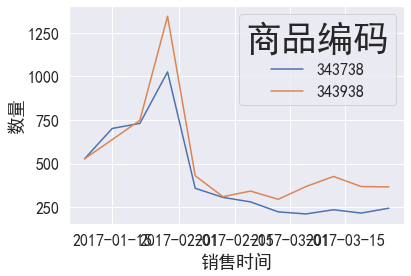

In [61]:
sns.lineplot(x='销售时间',y='数量',hue='商品编码',
           data=mall_sale[mall_sale['销售时间'].isin(date_range)][mall_sale['商品编码'].isin(top_skus)].groupby(['商品编码','销售时间']).sum().reset_index())

D:\software\anaconda\anaconda\Lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='销售时间', ylabel='数量'>

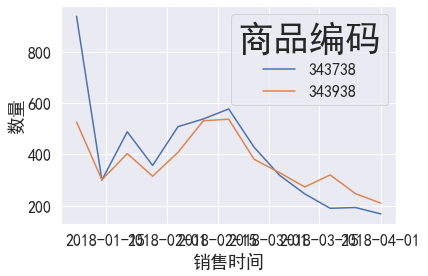

In [62]:
date_range_2018 = pd.date_range('2018-1','2018-4', freq='w')
sns.lineplot(x='销售时间',y='数量',hue='商品编码',
           data=mall_sale[mall_sale['销售时间'].isin(date_range_2018)][mall_sale['商品编码'].isin(top_skus)].groupby(['商品编码','销售时间']).sum().reset_index())

In [63]:
data = mall_sale[mall_sale['销售时间'].isin(np.concatenate([date_range,date_range_2018]))][mall_sale['商品编码'].isin(top_skus)]
data.head()

D:\software\anaconda\anaconda\Lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,销售时间,数量,商圈,商品编码
98,2017-01-08,20,七宝,343738
99,2017-01-15,46,七宝,343738
100,2017-01-22,40,七宝,343738
101,2017-01-29,35,七宝,343738
102,2017-02-05,13,七宝,343738


In [64]:
data.to_excel('./input/top2_sales.xlsx', index=False)

In [65]:
_2017 = data[data['销售时间'].isin(date_range)]
_2018 = data[data['销售时间'].isin(date_range_2018)]
data_2017 = {key: _2017.loc[value] for key, value in _2017.groupby('商品编码').groups.items()}
data_2018 = {key: _2018.loc[value] for key, value in _2018.groupby('商品编码').groups.items()}

In [66]:
sku1 = '343938'
sku2 = '343738'
sku1_2017 = data_2017[sku1].set_index(['销售时间','商圈'])['数量'].unstack().fillna(0)
shangquan = sku1_2017.columns
sku2_2017 = data_2017[sku2].set_index(['销售时间','商圈'])['数量'].unstack()[shangquan].fillna(0)
sku1_2018 = data_2018[sku1].set_index(['销售时间','商圈'])['数量'].unstack()[shangquan].fillna(0)
sku2_2018 = data_2018[sku2].set_index(['销售时间','商圈'])['数量'].unstack()[shangquan].fillna(0)


sku1_2017.to_excel('./input/sku1_2017_sales.xlsx')
sku2_2017.to_excel('./input/sku2_2017_sales.xlsx')
sku1_2018.to_excel('./input/sku1_2018_sales.xlsx')
sku2_2018.to_excel('./input/sku2_2018_sales.xlsx')

In [67]:
cov = pd.DataFrame(np.cov(sku2_2017.values.T))
cov.to_excel('./input/sku2_2017_cov.xlsx')

n = len(shangquan)
sku2_2017_values = sku2_2017.values
import scipy
pearson_p_value = np.zeros(shape=(n, n))
pearson = np.zeros(shape=(n ,n))
for i in range(n):
    for j in range(n):
        ret = scipy.stats.pearsonr(sku2_2017_values.T[i], sku2_2017_values.T[j])
        pearson_p_value[i][j] = ret[1]
        pearson[i][j] = ret[0]
pearson = pd.DataFrame(pearson)
pearson_p_value = pd.DataFrame(pearson_p_value)
pearson.columns, pearson_p_value.columns = shangquan, shangquan
pearson.index, pearson_p_value.index = shangquan, shangquan
pearson.to_excel('./input/sku2_2017_pearson.xlsx')
pearson_p_value.to_excel('./input/sku2_2017_pearson_p_value.xlsx')




In [68]:
set(stores['商圈'].unique())-set(sku1_2017.columns)

{'刘行', '普陀中环', '紫藤路', '陕西南路'}

In [69]:
shangquan

Index(['七宝', '世博源', '世纪大道', '五莲路', '五角场', '共康路', '南京东路', '周浦', '嘉松中路', '娄山关路',
       '宝山巴黎春天', '宝山白玉兰广场', '徐家汇', '江浦路地铁站', '浦东巴黎春天', '浦东金汇广场', '环球港', '莘庄',
       '莲花路', '虹桥天地', '金运路', '陆家嘴', '静安寺'],
      dtype='object', name='商圈')

# Graph

In [111]:
rider_speed = 12  # XX km/hr
Aplus_time_limit = 1  # A+ store must be fulfilled within X hr(s)
allowed_rider_travel_time = 2  # X hrs allowed for riders on the way


distance = pd.read_excel('./input/network_distance.xlsx', index_col=0)
shangquan_1hr_arrival = ['南京东路', '静安寺', '世纪大道', '陆家嘴', '五角场']
shangquan_1hr_arrival_cols = []
for k, col in enumerate(distance.columns):
    if col in shangquan_1hr_arrival:
        shangquan_1hr_arrival_cols.append(k)

travel_time = distance.values/rider_speed
graph = np.where(travel_time<=2, 1, 0)
for k in shangquan_1hr_arrival_cols:
    graph[:, k] = np.where(travel_time[:, k] <= Aplus_time_limit, 1, 0)
print(graph)
pd.DataFrame(graph, index=distance.index, columns=distance.columns).to_excel('./input/graph.xlsx')

[[1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1]
 [1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0]
 [1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1]
 [0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0]]


In [119]:
3.91

3.91

In [120]:
np.asarray([4.26, 6.36, 2.21, 5.39, 3.29, 3.82, 3.79])*200*7

array([5964., 8904., 3094., 7546., 4606., 5348., 5306.])